In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
liq_features = './liquor_5_selectors_4_analysis/blocked_5_liquor_4_sel_feature_importance-7-8-12-15.csv'
cheese_features = './cheese_5_selectors_4_analysis/blocked_5_cheese_4_sel_feature_importances.csv'
oil_features = './oil_5_selectors_4_analysis/blocked_5_oil_4_sel_feature_importance_coco_ses.csv'

liq_feat = pd.read_csv(liq_features).rename(columns={'Unnamed: 0':'feat_name'})
cheese_feat = pd.read_csv(cheese_features).rename(columns={'Unnamed: 0':'feat_name'})
oil_feat = pd.read_csv(oil_features).rename(columns={'Unnamed: 0':'feat_name'})


ok go through, sort each selector, plot top 20 features with std

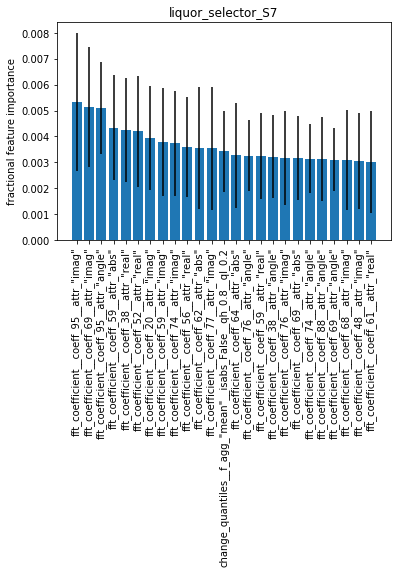

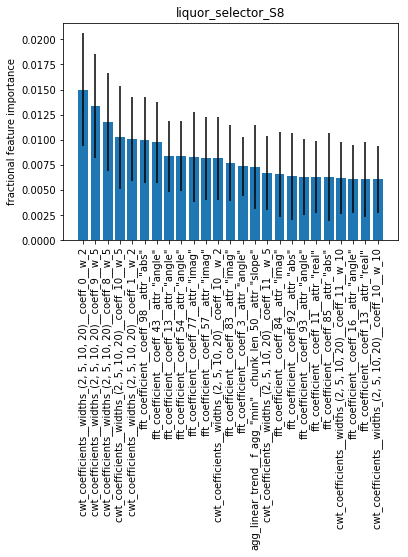

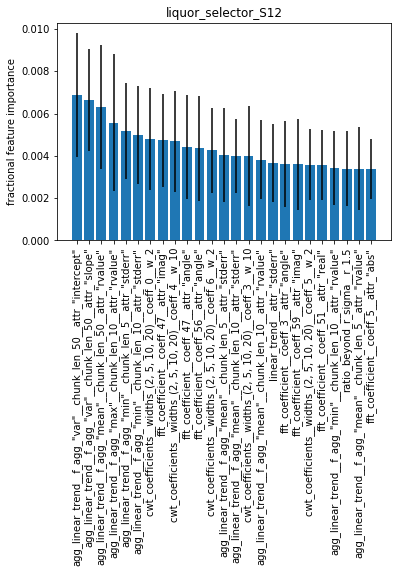

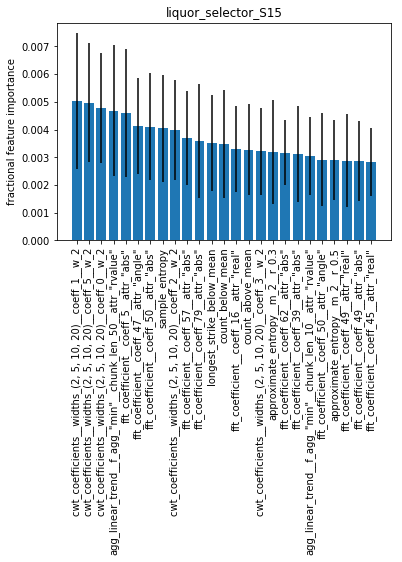

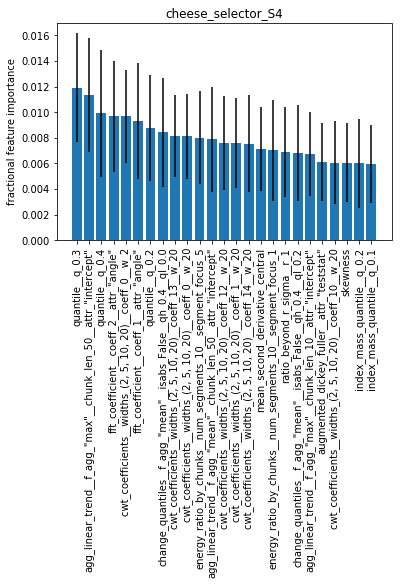

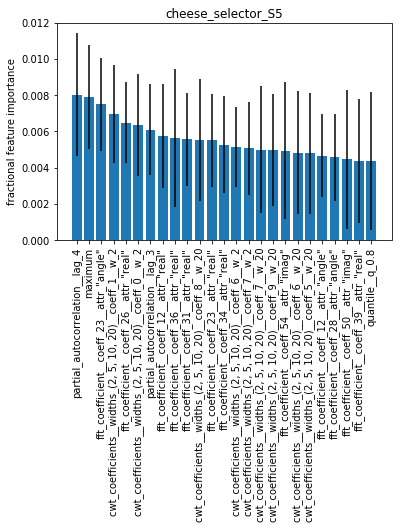

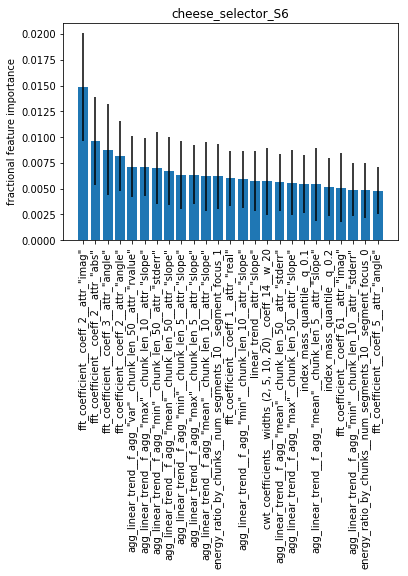

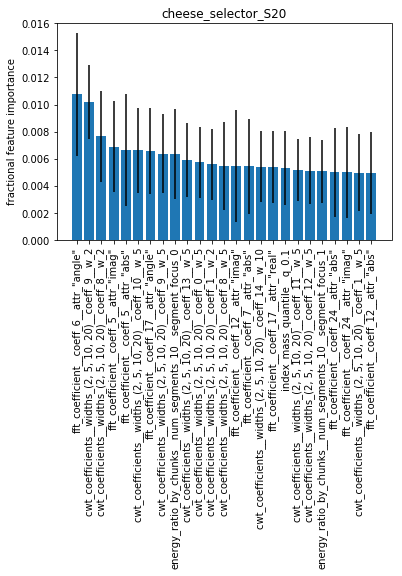

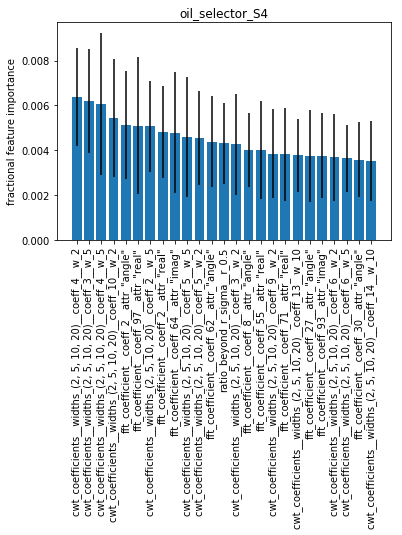

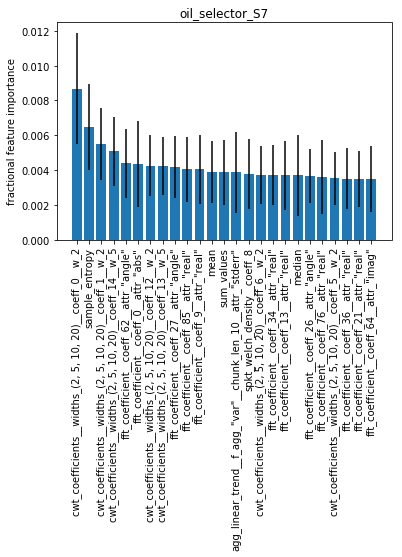

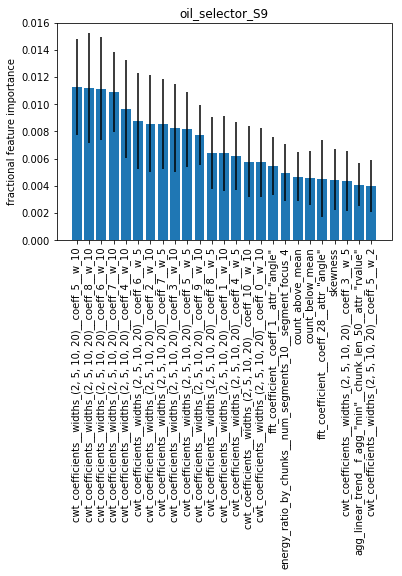

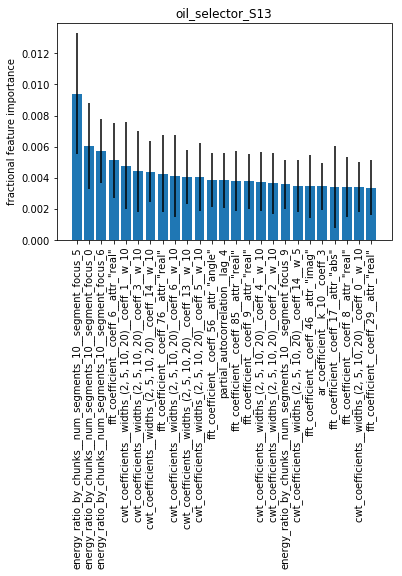

In [5]:
def sort_features(df):
    sorted_df = []
    for col in df:
        if 'mean' in col:
            df = df.sort_values(col, ascending=False)
            sorted_df.append(df[['feat_name',col,col[:-4]+'std']].reset_index().drop(columns=['index']))
    sorted_df = pd.concat(sorted_df, axis=1)
    return sorted_df

# save these and give to Vera for her plotting for consistency
sorted_liq = sort_features(liq_feat)
sorted_liq.to_csv('./liquor_5_selectors_4_analysis/blocked_sorted_5_liquor_4_sel_feature_importance.csv')
sorted_cheese = sort_features(cheese_feat)
sorted_cheese.to_csv('./cheese_5_selectors_4_analysis/blocked_sorted_5_cheese_4_sel_feature_importances.csv')
sorted_oil = sort_features(oil_feat)
sorted_oil.to_csv('./oil_5_selectors_4_analysis/blocked_sorted_5_oil_4_sel_feature_importances.csv')

#data exploration...
def plot_top_features(df, dataset, to_plot=25):
    #0,3,6,9
    for i in range(0,df.shape[1], 3):
        data = df.iloc[:,i:i+3]
        title = dataset+'_selector_'+list(data.columns)[1][:-5]
        data = data.iloc[:to_plot,:]
        x = [i for i in range(data.shape[0])]
        y = list(data.iloc[:,1])
        y_err = list(data.iloc[:,2])
        plt.bar(x,y, yerr=y_err)
        plt.xticks(x, list(data.iloc[:,0]),rotation=90)
        plt.ylabel('fractional feature importance')
        plt.title(title)
        plt.show()
plot_top_features(sorted_liq, 'liquor')  
plot_top_features(sorted_cheese, 'cheese')  
plot_top_features(sorted_oil, 'oil')  


In [6]:
def make_short_names(df):
    test = list(df['feat_name'].values)

    shorten = {'cwt':[0,6,7,-1], 'change':[0,1,5,8,11,-1], 'agg':[1,6,8,9,10,-1], 
               'fft':[0,3,4,-1], 'autocorrelation':[0,1,5], 'energy':[0,1,7,9,-1]}
    test = [ele.split('_') for ele in test]

    new_list = []
    for ele in test:
#         print('_'.join(ele))
        new = []
        if ele[0] in shorten:
            if ele[0] == 'autocorrelation':
                new.append(ele[0])
                new.append(ele[2])
                new.append(ele[3])
            elif ele[1] == 'autocorrelation':
                for num in shorten[ele[1]]:
    #                 print(ele, num)
    #                 print(ele[num])
                    new.append(ele[num])
            else:
                if ele[0] == 'fft' and ele[1] == 'aggregated':
                    new.append(ele[0])
                    new.append(ele[1])
                    new.append(ele[-1])
                else:
                    for num in shorten[ele[0]]:
                        new.append(ele[num])
        else:
            new = '_'.join(ele)
        if type(new) == list:
            new = '_'.join(new)
#         print(new)
        new_list.append(new)
    df['short_names'] = new_list
    return df
cheese_with_short = make_short_names(cheese_feat)
liq_with_short = make_short_names(liq_feat)
oil_with_short = make_short_names(oil_feat)

oil_with_short

,feat_name,S4_mean,S7_mean,S9_mean,S13_mean,S4_std,S7_std,S9_std,S13_std,short_names
0,abs_energy,0.000924,0.002945,0.000582,0.000762,0.000824,0.001579,0.000563,0.000767,abs_energy
1,absolute_sum_of_changes,0.000970,0.000766,0.000779,0.001057,0.000733,0.000628,0.000559,0.000696,absolute_sum_of_changes
2,"agg_autocorrelation__f_agg_""mean""",0.001130,0.000849,0.001078,0.001318,0.000553,0.000549,0.000666,0.000624,"agg_autocorrelation_""mean"""
3,"agg_autocorrelation__f_agg_""median""",0.001424,0.000998,0.001009,0.001432,0.000625,0.000560,0.000855,0.000898,"agg_autocorrelation_""median"""
4,"agg_autocorrelation__f_agg_""var""",0.001039,0.000783,0.003167,0.001938,0.000634,0.000542,0.001562,0.001003,"agg_autocorrelation_""var"""
5,"agg_linear_trend__f_agg_""max""__chunk_len_10__a...",0.000734,0.002465,0.000863,0.000828,0.000460,0.001714,0.000784,0.000909,"linear_""max""_chunk_len_10_""intercept"""
6,"agg_linear_trend__f_agg_""max""__chunk_len_10__a...",0.000935,0.000561,0.002931,0.002487,0.000599,0.000483,0.001494,0.001422,"linear_""max""_chunk_len_10_""rvalue"""
7,"agg_linear_trend__f_agg_""max""__chunk_len_10__a...",0.001489,0.000697,0.000759,0.001385,0.000947,0.000641,0.000751,0.001183,"linear_""max""_chunk_len_10_""slope"""
8,"agg_linear_trend__f_agg_""max""__chunk_len_10__a...",0.001270,0.001486,0.001575,0.001674,0.000713,0.000871,0.000873,0.001069,"linear_""max""_chunk_len_10_""stderr"""
9,"agg_linear_trend__f_agg_""max""__chunk_len_50__a...",0.000903,0.002140,0.000768,0.000731,0.000658,0.001519,0.000599,0.000632,"linear_""max""_chunk_len_50_""intercept"""


In [7]:
from matplotlib.ticker import AutoMinorLocator

def f_name(df, label, just_f=False):
    index_num = list(df.index)
    index_num = ['F'+str(int(ele)+1) for ele in index_num]
    new_names = []
    if not just_f:
        for new, old in zip(index_num,list(df['short_names'].values)):
            if 'cwt' in old:
                new = new+ '_cwt'
            elif 'fft' in old:
                new = new + '_fft'
            else:
                pass
            new_names.append(new)
    else:
        new_names = index_num
        new_names = [ele+'_{}'.format(label) for ele in new_names]
    df['shorter_names'] = new_names
    return df

### can we say anything about how often a feature is useful? 
def get_feat_overall_imp(df, l, color_map, name,jf=False, to_plot=20):
    cmap = plt.cm.get_cmap(color_map)
    c_1 = cmap(0)
    c_2 = cmap(0.3333)
    c_3 = cmap(0.6666)
    c_4 = cmap(1.0)
    sum_col = np.zeros((df.shape[0]))
    for col in df:
        if 'mean' in col:
            sum_col += df[col]
    df['feature_summed_percent'] = sum_col
    df = df.sort_values('feature_summed_percent', ascending=False)
    df = df.reset_index()
    df = f_name(df,l, just_f=jf)
    df.to_csv(name[:-4]+'_summed_imp_short_names.csv')
    
    name_list = list(df['shorter_names'].values)
    cols = list(df.columns)[2:6]
    s_1 = list(df[cols[0]].values*100)
    s_2 = list(df[cols[1]].values*100)
    s_3 = list(df[cols[2]].values*100)
    s_4 = list(df[cols[3]].values*100)
    leg_names = [col[:-5] for col in cols]
    
    fig = plt.figure(figsize=(1.75,1.5),dpi=300)
    plt.bar([i for i in range(to_plot)], s_1[:to_plot],linewidth=0.4,edgecolor='k',color=c_1)
    plt.bar([i for i in range(to_plot)], s_2[:to_plot],linewidth=0.4,edgecolor='k',bottom=s_1[:to_plot], color=c_2)
    plt.bar([i for i in range(to_plot)], s_3[:to_plot],linewidth=0.4,edgecolor='k',color=c_3 ,bottom=[ele1+ele2 for ele1,ele2 in zip(s_1[:to_plot],s_2[:to_plot])])
    plt.bar([i for i in range(to_plot)], s_4[:to_plot],linewidth=0.4,edgecolor='k',color=c_4 ,bottom=[ele1+ele2+ele3 for ele1,ele2,ele3 in zip(s_1[:to_plot],s_2[:to_plot],s_3[:to_plot])])
    plt.xticks([i for i in range(to_plot)], name_list[:to_plot], rotation=90)
    
    
    ax = plt.gca()
    ax.tick_params(axis='x', which='minor')
#     ax.minorticks_on()
    line_width = 0.8
    [i.set_linewidth(line_width) for i in ax.spines.values()]
    ax.tick_params(top=True, right=True)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
#     ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    # ax.tick_params(which='both', axis="y",direction="in")
    # ax.tick_params(which='both', axis="x",direction="in")
    ax.xaxis.set_tick_params(width=line_width-0.2)
    ax.yaxis.set_tick_params(width=line_width-0.2)
    ax.tick_params(which='major', length=2.5)
    ax.tick_params(which='minor', length=1.5)
    # setting tick label size / style
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties('Arial')
        label.set_fontsize(4) 
        label.set_fontweight('bold')
    # get the font and style of the axis labels
    lfont = {'fontname':'Arial', 'fontsize':6, 'weight':'bold'}
    ax.set_ylabel('Feature Importance (%)', **lfont)
    
    
    legend_prop = {'family':'Arial', 'size':5, 'weight':'bold'}
    plt.legend(leg_names, bbox_to_anchor=(1, 1.15), frameon=False, prop=legend_prop, handletextpad=0.1, labelspacing=0.1, ncol=5)
#     plt.show()
    plt.savefig(name, bbox_inches='tight')
    plt.gcf().clear()
    
get_feat_overall_imp(cheese_with_short,'C', 'RdBu', './blocked_just_F_cheese_feat_importance.png',jf=True, to_plot=16)
get_feat_overall_imp(liq_with_short,'L', 'PiYG','./blocked_just_F_liquor_feat_importance.png',jf=True, to_plot=16)
get_feat_overall_imp(oil_with_short,'O','BrBG','./blocked_just_F_oil_feat_importance.png',jf=True, to_plot=16)

<Figure size 525x450 with 0 Axes>

<Figure size 525x450 with 0 Axes>

<Figure size 525x450 with 0 Axes>